# Mushroom classification

Safe to eat or deadly poison?

## Links

This dataset was found at:

* [Kaggle - Mushroom classification](https://www.kaggle.com/uciml/mushroom-classification)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [4]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


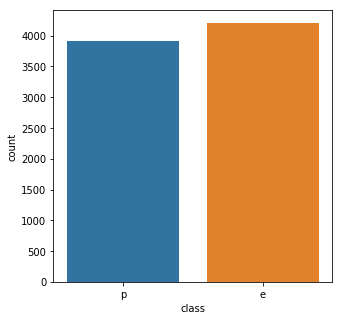

In [5]:
fig, ax = plt.subplots(figsize=(5,5))
sbn.countplot(data=df,x='class')

In [6]:
# odor_classp = df[df['class'] == 'p'].odor
# odor_classe = df[df['class'] == 'e'].odor
# fig, ax = plt.subplots(figsize=(5,5))
# sbn.distplot(odor_classp,ax=ax,label='Poison')
# sbn.distplot(odor_classe,ax=ax,label='Edible')
# plt.legend()


In [7]:
# plt.bar(X, odor_classp.value_counts(), width, color='b', label='Customer')
# plt.bar(X + width, odor_classe.value_counts(), width, color='g', label='Subscriber')
# plt.title('Proporção de viagens de acordo com subscrição durante o dia')
# plt.ylabel('Proporção')
# plt.xlabel('Horas do dia')
# plt.xticks(X)
# plt.legend()

## Construção do modelo



### Conversão dos dados para integers

In [8]:
# from sklearn import preprocessing

In [9]:
# le = preprocessing.LabelEncoder()
# le.fit(['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z'])
# new_df = df.apply(le.fit_transform)

In [10]:
# new_df = pd.get_dummies(df)
# new_df.head()

### Conjunto (X,y)

In [11]:
X_df = df.drop('class',axis=1)
y_df = df['class']

In [12]:
X = pd.get_dummies(X_df).values

In [13]:
y = y_df.values

### Separar o conjunto de treinamento e o conjunto de teste


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

### Criação do modelo

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
clf = DecisionTreeClassifier(criterion='entropy')

In [18]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
y_pred = clf.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [21]:
accuracy_score(y_test, y_pred)

1.0

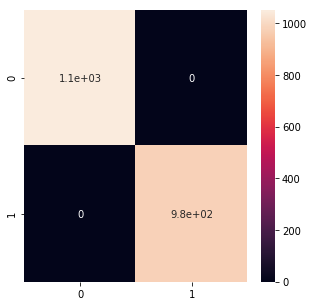

In [22]:
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sbn.heatmap(cm,annot=True)

### Visualizando a árvore

In [23]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

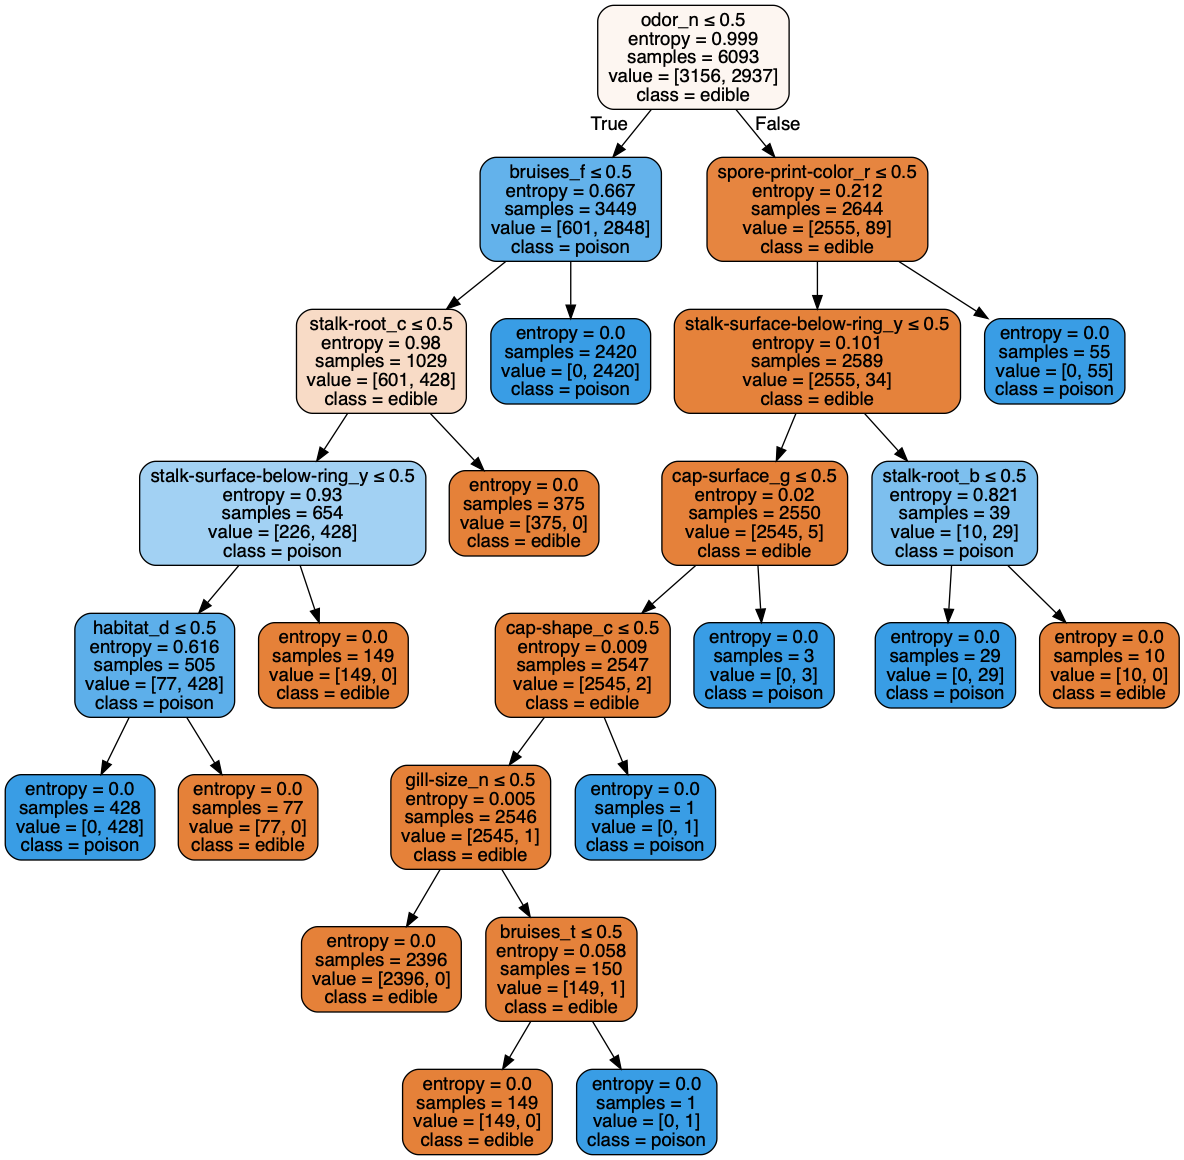

In [24]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                class_names=['edible','poison'],
                feature_names=pd.get_dummies(X_df).columns.values)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Relatório de Classificação

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1052
           p       1.00      1.00      1.00       979

   micro avg       1.00      1.00      1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



### Validação Cruzada

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
nclf = DecisionTreeClassifier(criterion='entropy')

In [29]:
accs = cross_val_score(nclf,X,y,cv=200,verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    5.4s finished


In [30]:
accs.mean()

1.0

In [31]:
accs.std()

0.0